# Capstone III Preprocessing and Training Data Development

In this section we prepare our cleaned data for modeling. With this data set we have, in a sense, two sets of explanatory variables that may explain our target variable: time (how the room temperature changes over time), and the rest of the measurement data (how does co2/light/precipatation affect the room temperature). What we'd like to do model both sets of independent/dependent variables seperately to see which model better predicts room temperature. 

Our data has already come to us split into training and testing sets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../Data/train_cleaned.csv', parse_dates = ['date', 'date_time'], index_col = 'date_time')
test = pd.read_csv('../Data/test_cleaned.csv', parse_dates = ['date', 'date_time'], index_col = 'date_time')

In [3]:
train.head()

,date,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,rain,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,day_of_the_week,indoor_temperature_room
date_time,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,2012-03-13,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
2012-03-13 12:00:00,2012-03-13,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2012-03-13 12:15:00,2012-03-13,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
2012-03-13 12:30:00,2012-03-13,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
2012-03-13 12:45:00,2012-03-13,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


In [13]:
test.head()

,date,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,rain,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,day_of_the_week
date_time,,,,,,,,,,,,,,,,
2012-04-18 00:00:00,2012-04-18,207.840,206.560,31.5800,30.1600,11.7200,14.1600,0.0,0.65,0.000000,0.0,0.0,0.0,-3.12000,39.0800,3.0
2012-04-18 00:15:00,2012-04-18,207.499,206.101,31.6240,30.0613,11.5240,14.7600,0.0,0.65,0.000000,0.0,0.0,0.0,-2.80800,38.9680,3.0
2012-04-18 00:30:00,2012-04-18,207.360,206.805,31.6507,30.1773,11.6220,14.9547,0.0,0.65,0.088000,0.0,0.0,0.0,-2.96400,38.9467,3.0
2012-04-18 00:45:00,2012-04-18,207.445,206.325,31.6987,30.2560,11.7847,15.0520,0.0,0.65,0.127333,0.0,0.0,0.0,-3.02933,39.0760,3.0
2012-04-18 01:00:00,2012-04-18,207.840,205.952,31.7707,30.3840,11.5887,15.2147,0.0,0.65,0.000000,0.0,0.0,0.0,-2.88600,40.0413,3.0


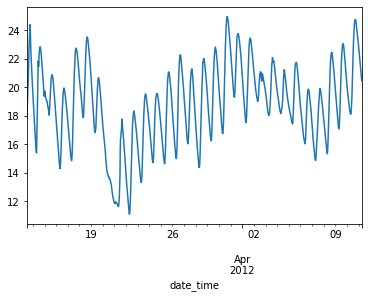

In [5]:
# Remind ourselves of the shape of the dependent variable over time. If there's seasonality or trend
train['indoor_temperature_room'].plot()
plt.show()

In [39]:
train['lagged_temp'] = train['indoor_temperature_room'].diff().fillna(

<AxesSubplot:xlabel='date_time'>

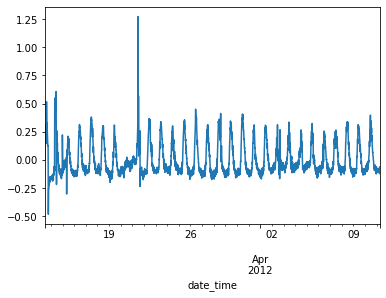

In [19]:
train['lagged_temp'].plot()

In [47]:
train['lagged_temp']

date_time
2012-03-13 11:45:00    0.0000
2012-03-13 12:00:00    0.2932
2012-03-13 12:15:00    0.3160
2012-03-13 12:30:00    0.3146
2012-03-13 12:45:00    0.2901
                        ...  
2012-04-11 05:30:00   -0.0773
2012-04-11 05:45:00   -0.1134
2012-04-11 06:00:00   -0.1226
2012-04-11 06:15:00   -0.0627
2012-04-11 06:30:00   -0.0800
Name: lagged_temp, Length: 2764, dtype: float64

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARMA(train['lagged_temp'], order = (0, 1))

TypeError: __init__() got an unexpected keyword argument 'frequency'